<a href="https://colab.research.google.com/github/ArijeetGoswami/-CUSTOMER-CHURN-PREDICTION-FOR-A-TELECOM-COMPANY/blob/main/customer_churn_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing data-set
import kagglehub
path = kagglehub.dataset_download("abdullah0a/telecom-customer-churn-insights-for-analysis")
print("path of file: ",path)


100%|██████████| 14.7k/14.7k [00:00<00:00, 9.86MB/s]

Extracting files...
path of file:  /root/.cache/kagglehub/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis/versions/1


In [ ]:
#for taking out the csv file

import os

for file in os.listdir(path):
  if file.endswith(".csv"):
    csv_file = os.path.join(path,file)
    break

In [ ]:
#imporant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading of the data-set
data_set = pd.read_csv(csv_file)
data_set.head()   #seeign the data-set for successful load ---> you can also use tail

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [ ]:
#lets have some more infomration
detail_infromation = data_set.info()
print(f"the detail infomration: ",{detail_infromation})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
the detail infomration:  {None}


In [ ]:
# @title lets go ahead with the missing values

null_values_in_data = data_set.isnull().sum()
print("NULL VALUES OF THE DATASET")
print(null_values_in_data)


print("*"*80)

# we can also check it with the na values
na_values_in_data = data_set.isna().sum()
print("NA VALUES FOR THE DATA-SET")
print(na_values_in_data)


NULL VALUES OF THE DATASET
CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64
********************************************************************************
NA VALUES FOR THE DATA-SET
CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64


In [ ]:
# @title CLEANINNG THE DATA-SET


In [ ]:
#SINCE WE FOUND THE NULL VLAUES IN THE INTERNETSERVICE COLUMN LETS START CLEANING IT

data_set['InternetService'] = data_set['InternetService'].fillna("")
data_set['InternetService']

,InternetService
0,Fiber Optic
1,Fiber Optic
2,Fiber Optic
3,DSL
4,
...,...
995,Fiber Optic
996,
997,Fiber Optic
998,


In [ ]:
#lets check the data-set wether the nullvalues are removed or not
update_null_values_in_data = data_set.isnull().sum()
print(f"the updated values of the data ")
print(update_null_values_in_data)

the updated values of the data 
CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64


AS WE HAVE CLEARLY REMOVE THE NULL VALUES FROM OUR DATA SET AND ALL MISSING VALUES ARE REPLACED

In [ ]:
# @title DUPLICATE VALUES IN THE DATASET


In [ ]:
duplicate_values_of_dataset = data_set.duplicated().sum()
print(f"the duplicate values of the dataset: ",duplicate_values_of_dataset)

the duplicate values of the dataset:  0


no duplicate values in our data-set


In [ ]:
# @title lets have a numnerical summmary for the data


In [ ]:
numnerical_data = data_set.describe()
print(f"the numnerical data of the dataset: ")
print(numnerical_data)

the numnerical data of the dataset: 
        CustomerID          Age      Tenure  MonthlyCharges  TotalCharges
count  1000.000000  1000.000000  1000.00000     1000.000000   1000.000000
mean    500.500000    44.674000    18.97300       74.391290   1404.364060
std     288.819436     9.797741    18.89257       25.712083   1571.755048
min       1.000000    12.000000     0.00000       30.000000      0.000000
25%     250.750000    38.000000     5.00000       52.357500    345.217500
50%     500.500000    45.000000    13.00000       74.060000    872.870000
75%     750.250000    51.000000    26.00000       96.102500   1900.175000
max    1000.000000    83.000000   122.00000      119.960000  12416.250000


lets detemine correlation between these values

In [ ]:
# @title Dtermining the correlation

#lets take out the numerical column

def numerical_coulumn(self):
  #hecking only the numerical column for the data_Set
  numerical_data = self.select_dtypes(include=np.number)
  print(f"the numerical data of the dataset: ")
  print(numerical_data)
  print("*"*80)
  #lets cj=heck for the correlation among the numerical_data
  numrical_data_corr = numerical_data.corr()
  print(f"the correlation of the numerical data: ")
  print(numrical_data_corr)

In [ ]:
#cretae an object
numerical_data_column = numerical_coulumn(data_set)
numerical_data_column

the numerical data of the dataset: 
     CustomerID  Age  Tenure  MonthlyCharges  TotalCharges
0             1   49       4           88.35        353.40
1             2   43       0           36.67          0.00
2             3   51       2           63.79        127.58
3             4   60       8          102.34        818.72
4             5   42      32           69.01       2208.32
..          ...  ...     ...             ...           ...
995         996   42      41           37.14       1522.74
996         997   62       9           80.93        728.37
997         998   51      15          111.72       1675.80
998         999   39      68           65.67       4465.56
999        1000   50       1           56.67         56.67

[1000 rows x 5 columns]
********************************************************************************
the correlation of the numerical data: 
                CustomerID       Age    Tenure  MonthlyCharges  TotalCharges
CustomerID        1.000000  0.036

cosider two relation ship

1. positive 1 for strong relationship  (upper movement) +1
2. neagtive 1 for strong -ve relationship (lower movement) -1


eg suppose we have age and tenure , age -> increases, tenure ->decreases




In [ ]:
# @title lets do DATA-VIZULIZATION


In [ ]:
#LETS CALL THE DATA-SET
data_set.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [ ]:
data_set.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

**PIE CHART**

In [ ]:
# @title DATA-SET NULERICAL AND CATEGORICAL DIVISION
NUMERICAL_LIST = []
CATEGORICAL_LIST = []

def numerical_and_categorical_division(data_set):
  for col in data_set.columns:
    if data_set[col].dtype == 'object':
      CATEGORICAL_LIST.append(col)
      print(f"the categorcial list: ",CATEGORICAL_LIST)
    else:
      NUMERICAL_LIST.append(col)
      print(f"the numerical list: ",NUMERICAL_LIST)
  return CATEGORICAL_LIST,NUMERICAL_LIST



In [ ]:
numerical_and_categorical_division_object1 = numerical_and_categorical_division(data_set)
numerical_and_categorical_division_object1

the numerical list:  ['CustomerID']
the numerical list:  ['CustomerID', 'Age']
the categorcial list:  ['Gender']
the numerical list:  ['CustomerID', 'Age', 'Tenure']
the numerical list:  ['CustomerID', 'Age', 'Tenure', 'MonthlyCharges']
the categorcial list:  ['Gender', 'ContractType']
the categorcial list:  ['Gender', 'ContractType', 'InternetService']
the numerical list:  ['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
the categorcial list:  ['Gender', 'ContractType', 'InternetService', 'TechSupport']
the categorcial list:  ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']


(['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn'],
 ['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges'])

In [ ]:
#lets see the categorcial and numerical column sepearately
print(f"the catgeorcial values are as : {CATEGORICAL_LIST}")
print(f"the numerical values are as : {NUMERICAL_LIST}")

the catgeorcial values are as : ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']
the numerical values are as : ['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']


the value counts:  CustomerID
1000    1
1       1
2       1
3       1
4       1
       ..
13      1
12      1
11      1
10      1
9       1
Name: count, Length: 1000, dtype: int64


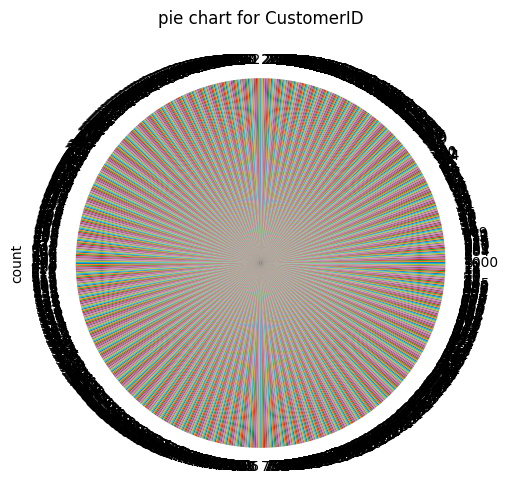

the value counts:  Age
39    49
45    47
47    46
44    45
48    42
51    41
42    40
40    38
46    38
37    33
50    32
49    31
52    30
38    30
53    29
36    29
41    28
43    26
35    25
55    24
34    22
32    20
56    20
54    19
60    19
30    18
59    16
33    16
63    14
31    14
29    13
58    10
57    10
28     9
27     8
61     8
62     8
66     7
24     7
25     5
26     5
65     4
18     3
70     3
69     3
67     2
64     2
20     2
23     2
68     1
83     1
72     1
12     1
75     1
21     1
22     1
71     1
Name: count, dtype: int64


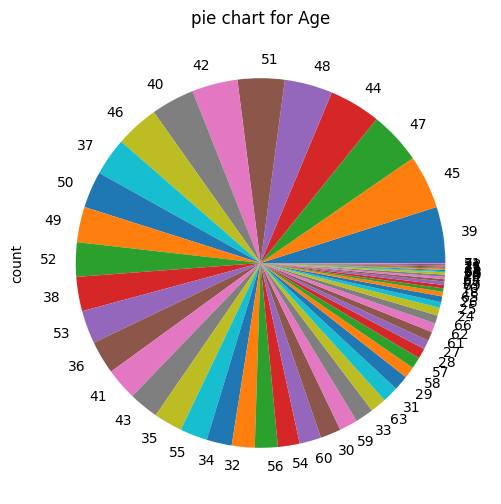

the value counts:  Tenure
1     55
0     51
6     48
2     41
10    36
      ..
83     1
76     1
69     1
55     1
61     1
Name: count, Length: 87, dtype: int64


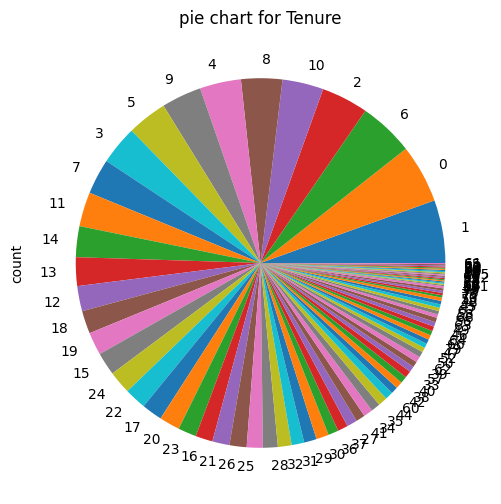

the value counts:  MonthlyCharges
54.48     3
89.55     3
49.68     3
67.01     3
78.63     3
         ..
51.43     1
111.76    1
72.13     1
71.97     1
86.46     1
Name: count, Length: 935, dtype: int64


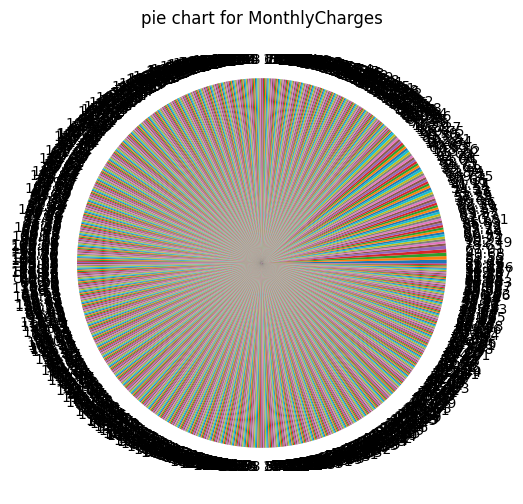

the value counts:  TotalCharges
0.00       51
179.10      2
353.40      2
1048.32     2
2005.74     2
           ..
223.52      1
2163.90     1
1439.40     1
351.20      1
1317.29     1
Name: count, Length: 943, dtype: int64


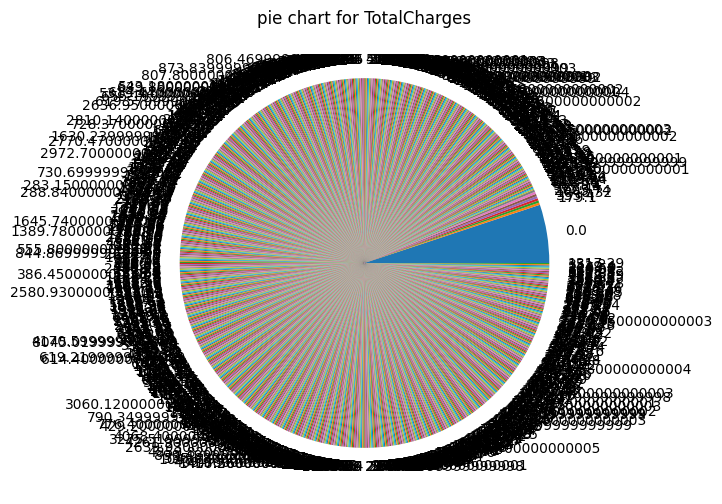

In [ ]:

#lets plotting the  pie chart for numerical list
for col in NUMERICAL_LIST:
    data_set[col].value_counts()
    print(f"the value counts: ",data_set[col].value_counts())
    VALUE_COUNTS = data_set[col].value_counts()
    #PLOTTING THE PIE CHART
    VALUE_COUNTS.plot(kind='pie', figsize=(100,6))
    plt.title(f"pie chart for {col}")
    plt.show()

In [ ]:
#LETS CHECK OUR PIE CHATR ONLY FOR THE CHURN COLUMN

def pie_chart_for_churn(data_set):
  data_set['Churn'].value_counts()
  print(f"the calue count for the churn column is {data_set['Churn'].value_counts()}")
  VALUE_COUNTS = data_set['Churn'].value_counts()
  #PLOTTING THE PIE CHART
  VALUE_COUNTS.plot(kind='pie', figsize=(100,6))
  plt.title(f"pie chart for churn")

the calue count for the churn column is Churn
Yes    883
No     117
Name: count, dtype: int64


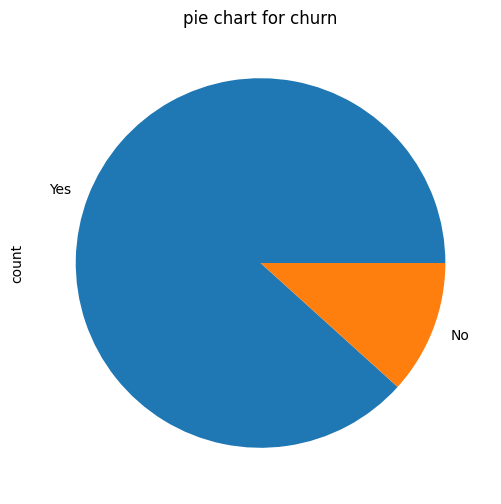

In [ ]:
data_set_pie_chart_churn = pie_chart_for_churn(data_set)
data_set_pie_chart_churn

In [ ]:
# @title LETS DTEMINE THE MEAN FOR THE NUMERICAL LIST ON TH BASIS OF CATEGORICAL

print(CATEGORICAL_LIST)
print(NUMERICAL_LIST)



['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']
['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
def mean_values_for(data_set):
  data_set.groupby(CATEGORICAL_LIST)[NUMERICAL_LIST].mean()
  return data_set.groupby(CATEGORICAL_LIST)[NUMERICAL_LIST].mean()

In [ ]:
mean_values_obj2 = mean_values_for(data_set)
mean_values_obj2

CustomerID  \
Gender ContractType   InternetService TechSupport Churn               
Female Month-to-Month                 No          Yes    533.433735   
                      DSL             No          Yes    564.727273   
                                      Yes         Yes    590.053571   
                      Fiber Optic     No          Yes    423.666667   
                                      Yes         Yes    462.951220   
       One-Year                       No          Yes    478.840909   
                      DSL             No          Yes    411.166667   
                                      Yes         No     491.857143   
                                                  Yes    428.300000   
                      Fiber Optic     No          Yes    349.000000   
                                      Yes         No     534.607143   
                                                  Yes    596.652174   
       Two-Year                       No          Yes    632.400000   
                      DSL             No          Yes    602.562500   
                                      Yes         No     455.428571   
                                                  Yes    398.947368   
                      Fiber Optic     No          Yes    371.818182   
                                      Yes         No     361.631579   
                                                  Yes    417.047619   
Male   Month-to-Month                 No          Yes    481.400000   
                      DSL             No          Yes    558.666667   
                                      Yes         Yes    467.836735   
                      Fiber Optic     No          Yes    531.214286   
                                      Yes         Yes    506.474576   
       One-Year                       No          Yes    469.369565   
                      DSL             No          Yes    534.700000   
                                      Yes         No     481.400000   
                                                  Yes    472.571429   
                      Fiber Optic     No          Yes    581.733333   
                                      Yes         No     547.142857   
                                                  Yes    433.076923   
       Two-Year                       No          Yes    542.368421   
                      DSL             No          Yes    371.166667   
                                      Yes         No     470.000000   
                                                  Yes    501.750000   
                      Fiber Optic     No          Yes    576.666667   
                                      Yes         No     488.625000   
                                                  Yes    672.090909   

                                                               Age     Tenure  \
Gender ContractType   InternetService TechSupport Churn                         
Female Month-to-Month                 No          Yes    45.180723  16.843373   
                      DSL             No          Yes    45.863636  25.045455   
                                      Yes         Yes    44.892857  18.571429   
                      Fiber Optic     No          Yes    44.266667  21.000000   
                                      Yes         Yes    44.060976  19.463415   
       One-Year                       No          Yes    46.545455  18.772727   
                      DSL             No          Yes    47.000000  27.666667   
                                      Yes         No     44.428571  33.928571   
                                                  Yes    47.500000   8.700000   
                      Fiber Optic     No          Yes    50.545455  15.454545   
                                      Yes         No     40.714286  24.464286   
                                                  Yes    43.695652  11.608696   
       Two-Year                       No          Yes    46.800000  13.366667   
 

In [ ]:
data_set.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

** LETS FOCUS ON TWO CRITERIA**
*   CHURN VS AGE
*   CONTRACTTYPE VS MONTHLYCHARGES





In [ ]:
#special column focus     --> DETEMINING CHURN ON THE BASIS OF CHURN

print(data_set.groupby("Churn")["Age"].mean())
print("*"*80)
print(data_set.groupby("ContractType")["MonthlyCharges"].mean())


Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64
********************************************************************************
ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64


In [ ]:
#lets start plotting the bar graph

In [ ]:
#first numerical columns with respect to categorical columns

def bar_chart_categorical_numerical(data_set):
     data_set.groupby(CATEGORICAL_LIST)[NUMERICAL_LIST].mean().plot(kind='bar',figsize=(20,10))
     plt.title(f"the numerical distribution for {CATEGORICAL_LIST} with repect to {NUMERICAL_LIST}" )
     plt.show()


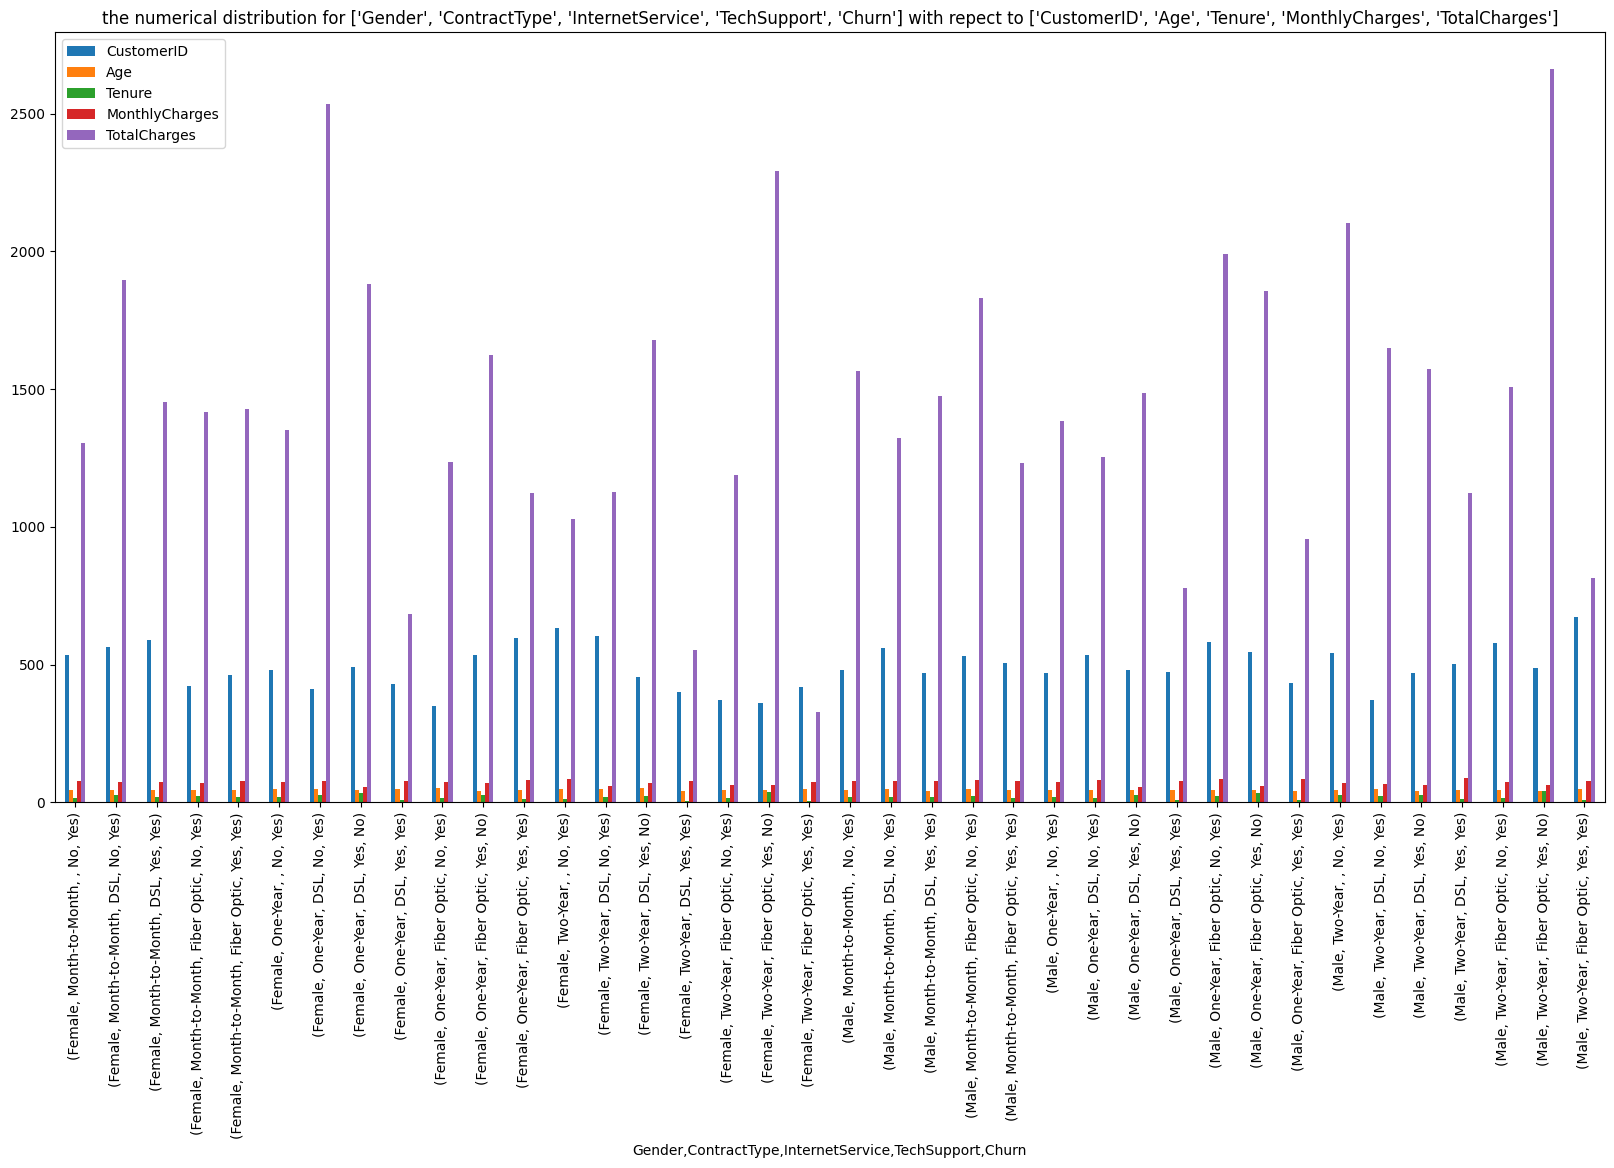

In [ ]:
bar_chart_categorical_numerical_object = bar_chart_categorical_numerical(data_set)
bar_chart_categorical_numerical_object

In [ ]:
data_set.columns


Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [ ]:
#lets only see for the for for the two criteria prescribed above

def bar_chart(data_set):
  fig,axs = plt.subplots(1,2,figsize=(20,10))   #crete row 1 and column 2 for figure of subplots

  data_set.groupby("Churn")["Age"].mean().plot(kind="bar",figsize=(4,10),ax=axs[0])
  axs[0].set_ylabel("mean Age")
  axs[0].set_title("Churn vs AGEs")



  data_set.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar",figsize=(9,10),ax=axs[1])
  axs[1].set_ylabel("mean MonthlyCharges")
  axs[1].set_title("ContractType vs MonthlyCharges")

  plt.tight_layout()
  plt.show()

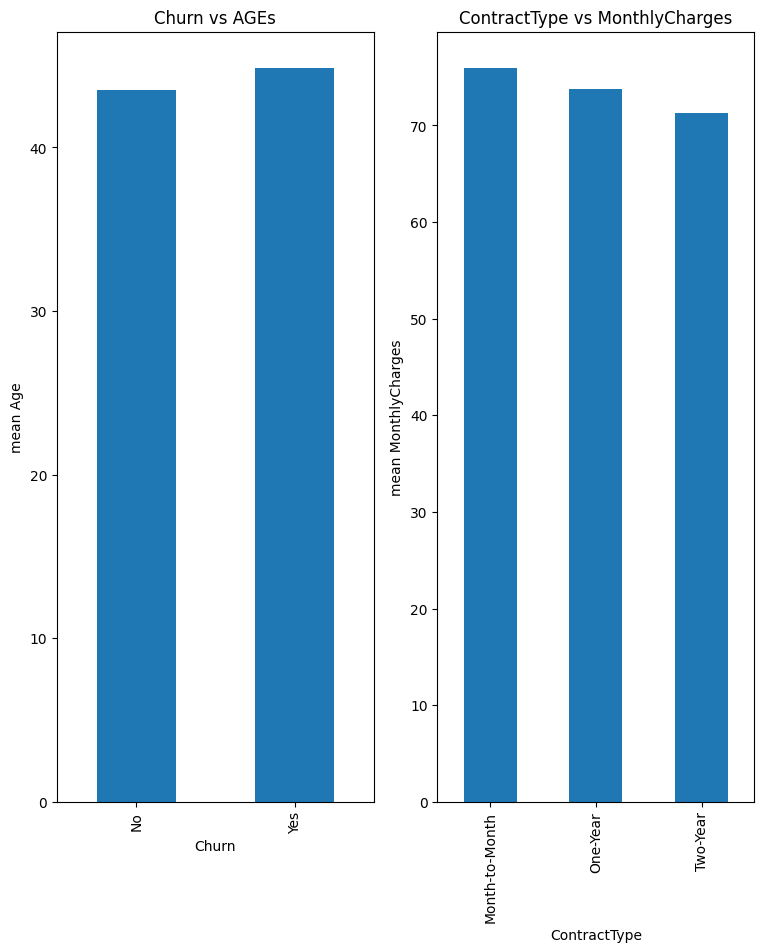

In [ ]:
bar_chart_object = bar_chart(data_set)
bar_chart_object

In [ ]:
#lets go ahead with the histogram


def histogram_chart(data_set):
  fig,axs = plt.subplots(2,2 ,figsize=(20,10))
  '''
  data_set["Churn"].plot(kind="hist",ax=axs[0])
  axs[0].set_title("HISTOGRAM FOR THE CHURN")
  '''


  print('*'* 40)

  data_set["Age"].plot(kind="hist",ax=axs[0,0])
  axs[0,0].set_title("histogram for the Ages")

  print('*'* 40)


  data_set['MonthlyCharges'].plot(kind='hist',ax=axs[0,1])
  axs[0,1].set_title("histogram for the Monthly Charges")

  print('*'* 40)


  data_set['TotalCharges'].plot(kind='hist',ax=axs[1,0])
  axs[1,0].set_title("histogram for the Total Charges")


  plt.tight_layout()
  plt.show()


****************************************
****************************************
****************************************


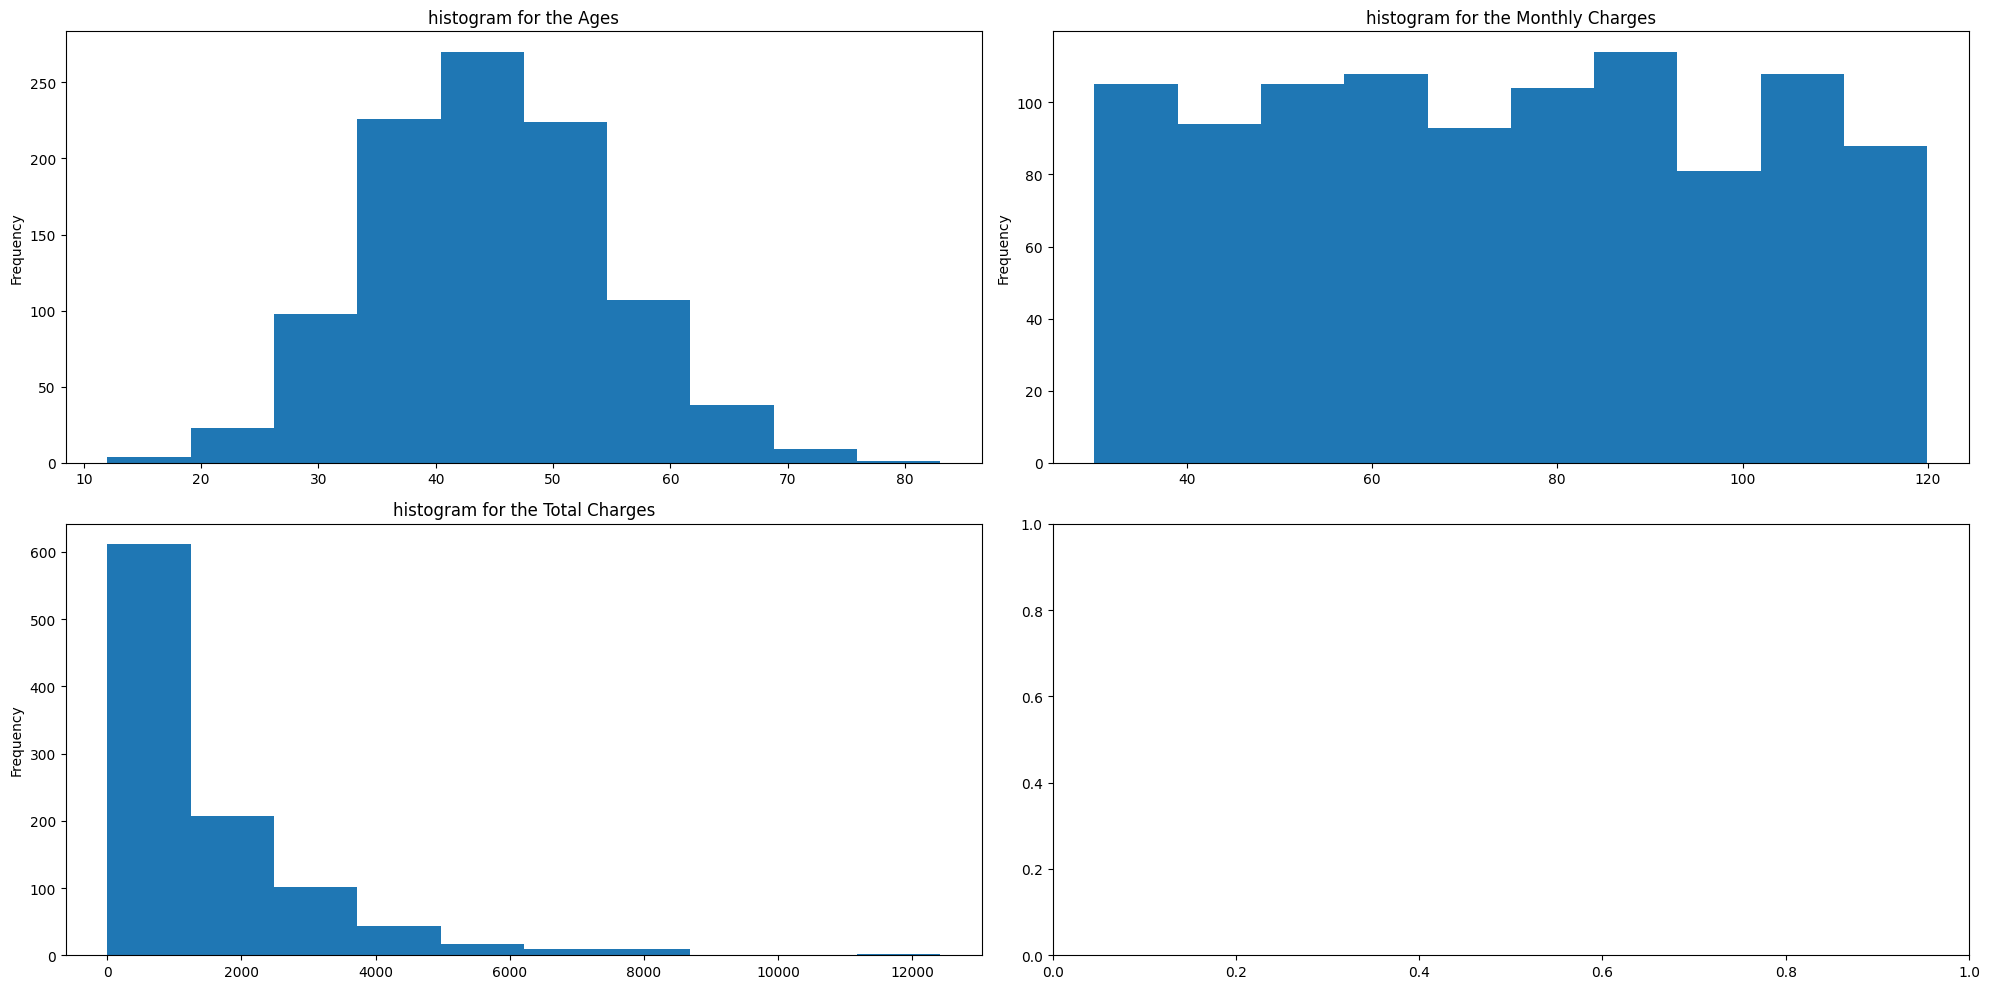

In [ ]:
histogram_chart_object = histogram_chart(data_set)
histogram_chart_object

In [ ]:
# @title Feature Engineering


In [ ]:
data_set.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

**here we will divide the columns into x and y labels
1.  y = Churn ---> which will be predicted
2.  x = columns whichwe will choose based on which the Y will predicted



In [ ]:
#here we will divide the

In [ ]:
#crete x and y variables
#gloabal variables which will be used tgroughout
Y = data_set[["Churn"]]  # for the prediction
X = data_set[["Age","Gender","MonthlyCharges","Tenure"]]

In [ ]:
X
#Y

,Age,Gender,MonthlyCharges,Tenure
0,49,Male,88.35,4
1,43,Male,36.67,0
2,51,Female,63.79,2
3,60,Female,102.34,8
4,42,Male,69.01,32
...,...,...,...,...
995,42,Male,37.14,41
996,62,Male,80.93,9
997,51,Female,111.72,15
998,39,Male,65.67,68


** HERE WE WILL USE LAMBDA FUNCTION **

1. First lets focus on the X variables



In [ ]:
X

,Age,Gender,MonthlyCharges,Tenure
0,49,Male,88.35,4
1,43,Male,36.67,0
2,51,Female,63.79,2
3,60,Female,102.34,8
4,42,Male,69.01,32
...,...,...,...,...
995,42,Male,37.14,41
996,62,Male,80.93,9
997,51,Female,111.72,15
998,39,Male,65.67,68


In [ ]:
Y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [ ]:
#LETS COVERT IT INTO TO NUMNERICAL VLAUES OF BOTH THE COLUMNS
#LETS MAKE IT GLOBAL VARIABLES
X["Gender"] = X["Gender"].apply(lambda x: 1 if x=="Male" else 0)
Y["Churn"] = Y["Churn"].apply(lambda x:1 if x=="Yes" else 0)


In [ ]:
#LETS CHECK THE COLUMNS THE VARIABLES
print(X)

print('*' * 80)
print(Y)

     Age  Gender  MonthlyCharges  Tenure
0     49       1           88.35       4
1     43       1           36.67       0
2     51       0           63.79       2
3     60       0          102.34       8
4     42       1           69.01      32
..   ...     ...             ...     ...
995   42       1           37.14      41
996   62       1           80.93       9
997   51       0          111.72      15
998   39       1           65.67      68
999   50       1           56.67       1

[1000 rows x 4 columns]
********************************************************************************
     Churn
0        1
1        1
2        1
3        1
4        1
..     ...
995      1
996      1
997      1
998      1
999      1

[1000 rows x 1 columns]


Now lets do Machine learning testing

In [ ]:
# @title MACHINE LEARNING MODEL


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


#here we will use 20 percent of the data for testing and 80 percent for training

In [ ]:
X

,Age,Gender,MonthlyCharges,Tenure
0,49,1,88.35,4
1,43,1,36.67,0
2,51,0,63.79,2
3,60,0,102.34,8
4,42,1,69.01,32
...,...,...,...,...
995,42,1,37.14,41
996,62,1,80.93,9
997,51,0,111.72,15
998,39,1,65.67,68


MODEL EVALUTAION

In [ ]:
X

,Age,Gender,MonthlyCharges,Tenure
0,49,1,88.35,4
1,43,1,36.67,0
2,51,0,63.79,2
3,60,0,102.34,8
4,42,1,69.01,32
...,...,...,...,...
995,42,1,37.14,41
996,62,1,80.93,9
997,51,0,111.72,15
998,39,1,65.67,68


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#lets train the x data
X_train = scaler.fit_transform(X_train)


#now save the data

import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [ ]:
# NOw for testing part
X_test = scaler.fit_transform(X_test)

In [ ]:
#lets check it
X_train
X_test

array([[ 0.57309103, -0.88640526,  1.08859098, -1.03475948],
       [ 0.98354119, -0.88640526,  1.64456522, -0.9281382 ],
       [-1.88960992,  1.12815215,  1.59448733, -0.44834246],
       [-0.5556469 , -0.88640526,  1.42707365,  0.3513171 ],
       [-1.17132214,  1.12815215, -0.70799902, -0.71489565],
       [ 0.98354119,  1.12815215, -0.72773775, -0.55496374],
       [-0.96609706, -0.88640526,  0.95626838,  0.72449157],
       [-0.96609706,  1.12815215, -1.44710481,  0.29800647],
       [ 0.67570357,  1.12815215, -1.57833081,  0.03145328],
       [-0.76087198, -0.88640526,  0.86890622,  3.33671282],
       [-0.45303436, -0.88640526, -1.45478098, -1.03475948],
       [ 0.06002834, -0.88640526, -0.7500352 ,  0.19138519],
       [ 0.88092865, -0.88640526,  0.42807458, -0.98144884],
       [-0.65825944, -0.88640526,  1.47349622,  0.19138519],
       [ 0.26525341, -0.88640526, -1.55201251, -0.55496374],
       [-0.86348452,  1.12815215, -1.0066387 , -0.28841055],
       [ 0.16264088,  1.

In [ ]:
# @title MODELLING


In [ ]:
#LETS GO WITRH ACCURACY SCORE   ---> takes values between 0 and 1
from sklearn.metrics import accuracy_score
def model_performace(prediction):
  print("the accuraccy score is {}".format(accuracy_score(Y_test,prediction)))


In [ ]:
# @title HYPER PARAMETER TUNNING FOR THE MODELS


#here we are gone use GRID SEARCH CV

from sklearn.model_selection import GridSearchCV    #--> utlize for svc


** OUR 1ST MODEL LOGISTICS REGRESSION **

In [ ]:
#importing the model
import warnings                            #just to filter the warnings and train model faster
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression


#save the model in the varabile
log_reg = LogisticRegression()


#lets fit OUR MODELS IN THE logistic Regression

log_reg.fit(X_train,Y_train)



#lets predict form the logistoc regression model

log_reg.predict(X_test)   # --> from the testing data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
#lets check the performace of the model

prediction1 = log_reg.predict(X_test)
model_performace(prediction1)

the accuraccy score is 0.885


HERE we can clearlty see the wiyth the help of logistoc regression our accuracy score in 88 percent

In [ ]:
# @title Support Vector Classifier MODEL

In [ ]:
#IMPORTING THE MODEL
from sklearn.svm import SVC


#creating a variable name SVM
svm = SVC()



'''
Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose']










'''

#Setting up parameters
param_grid = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["Linear","rbi","poly"],
}


#initilizing varaibale svc_model

svc_model = GridSearchCV(svm,param_grid,cv=5)



#lets fit the model

svc_model.fit(X_train,Y_train)


#lets check the parameters
print(svc_model.best_params_)


print("*" * 80)

#lets predict for the X_test --> 20percent data


svc_model.predict(X_test)




#model performace

prediction2 = svc_model.predict(X_test)
print(model_performace(prediction2))

{'C': 0.01, 'kernel': 'poly'}
********************************************************************************
the accuraccy score is 0.885
None


In [ ]:
#now lets dump the svc model




import joblib
joblib.dump(svc_model,"model.pkl")

['model.pkl']

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
# app.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # Ignore potential warnings from sklearn/joblib

# Load the trained model and scaler
try:
    model = joblib.load('model.pkl') # Your trained SVC model from GridSearchCV
    scaler = joblib.load('scaler.pkl') # Your trained StandardScaler
except FileNotFoundError:
    st.error("Model or scaler file not found. Make sure 'model.pkl' and 'scaler.pkl' are in the same directory.")
    st.stop() # Stop execution if files are missing

# --- Streamlit UI ---

st.title("Telecom Customer Churn Prediction")
st.write("Enter customer details to predict churn.")

# Input fields for the features used in the model
# Features were: "Age","Gender","MonthlyCharges","Tenure"

age = st.number_input("Age", min_value=18, max_value=100, value=30)
gender = st.selectbox("Gender", ["Male", "Female"])
monthly_charges = st.number_input("Monthly Charges", min_value=0.0, value=50.0)
tenure = st.number_input("Tenure (months)", min_value=0, max_value=100, value=12)

# Convert gender input to numerical (Male=1, Female=0 as per your notebook)
gender_encoded = 1 if gender == "Male" else 0

# Create a DataFrame with the input data
input_data = pd.DataFrame({
    "Age": [age],
    "Gender": [gender_encoded],
    "MonthlyCharges": [monthly_charges],
    "Tenure": [tenure]
})

# Button to make prediction
if st.button("Predict Churn"):
    # Preprocess the input data using the loaded scaler
    # The scaler expects input as a DataFrame or array, and will output a numpy array
    scaled_input = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(scaled_input) # model is the GridSearchCV object

    # Interpret the prediction
    # Your Y column 'Churn' was encoded: Yes=1, No=0
    if prediction[0] == 1:
        result = "This customer is likely to Churn"
        st.error(result) # Use st.error for visual emphasis on churn
    else:
        result = "This customer is unlikely to Churn"
        st.success(result) # Use st.success for visual emphasis on no churn

    # Optional: Show the raw prediction result
    # st.write(f"Raw prediction: {prediction[0]}")

2025-06-06 13:34:26.397 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 13:34:26.608 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-06 13:34:26.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 13:34:26.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 13:34:26.613 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 13:34:26.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 13:34:26.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-06 13:34:26.620 Thread 'MainThread': mi

In [ ]:
data_set.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [ ]:
data_set[data_set["Churn"]=="No"]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
